# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [430]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import scipy.stats as st
import pandas as pd
import numpy as np 



# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
merge_df = pd.merge(mouse_metadata,study_results, on="Mouse ID") 
merge_df.head()
# Display the data table for preview


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [333]:
# Checking the number of mice.
mice = merge_df["Mouse ID"].value_counts()
mice_number=len(mice)
mice_number

249

In [334]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
merge_df.loc[merge_df.duplicated(subset=["Mouse ID", "Timepoint"]),"Mouse ID"].unique()



array(['g989'], dtype=object)

In [249]:
# Optional: Get all the data for the duplicate mouse ID. 
merge_df.loc[merge_df["Mouse ID"]=="g989",:]

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [250]:
mice_duplicated = merge_df.loc[merge_df.duplicated(subset=["Mouse ID", "Timepoint"]),"Mouse ID"].unique()
cleaned_df=pd.DataFrame(mice_duplicated)
cleaned_df

,0
0,g989


In [251]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
cleaned_df=merge_df[merge_df["Mouse ID"].isin(mice_duplicated)==False]
cleaned_df.head(5)

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [256]:
# Checking the number of mice in the clean DataFrame.
cleaned_df=cleaned_df["Mouse ID"].value_counts()
cleaned_df

k403    10
o287    10
j984    10
k210    10
k382    10
        ..
h428     1
o848     1
t573     1
d133     1
x226     1
Name: Mouse ID, Length: 248, dtype: int64

## Summary Statistics

In [ ]:
statistics_table = cleaned_df.groupby(['Drug Regimen'])
statistics_table

In [272]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
#statistics_summary=cleaned_df[["Drug Regimen,=", "Tumor Volume"]].groupby(["Drug Regimen"]).agg(["mean", "median", "variance", "std", "SEM"])|

stat_table = statistics_table.agg({"Tumor Volume (mm3)":["mean", "median", "var", "std", "sem"]})
stat_table

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

In [273]:

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
mean=merge_df.groupby("Drug Regimen").mean()["Tumor Volume (mm3)"]
mean
median= merge_df.groupby("Drug Regimen").median()["Tumor Volume (mm3)"]
median
variance= merge_df.groupby("Drug Regimen").var()["Tumor Volume (mm3)"]
variance
standard_dev=merge_df.groupby("Drug Regimen").std()["Tumor Volume (mm3)"]
standard_dev
sems=merge_df.groupby("Drug Regimen").sem()["Tumor Volume (mm3)"]
sems

# Assemble the resulting series into a single summary DataFrame.
statistic_summary= pd.DataFrame({"Mean Tumor Volume":mean, "Median Tumor Volume":median, "Tumor Volume Variance":variance, "Tumor Volume Std. Dev.":standard_dev, "Tumor Volume Std. Err.":sems})
statistic_summary

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [450]:
stat_table1=pd.DataFrame({"Mean": mean, "Median": median, "Variance": variance, "Standard Deviation": standard_dev, "SEM" : sems})
stat_table1
stat_table1.to_csv("Statistic.csv", index=False, header=True)
stat_table1

,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [268]:
# Generate a summary statistics table of mean, median, variance, standard deviation, 
# and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line.
stat_table = statistics_table.agg({"Tumor Volume (mm3)":["mean", "median", "var", "std", "sem"]})
stat_table

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

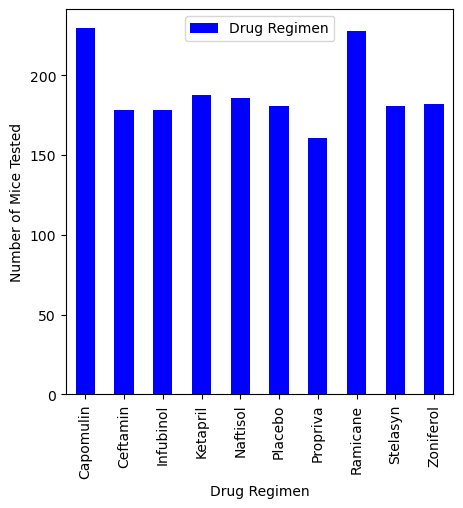

In [382]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.
treated_mice=merge_df.groupby(["Drug Regimen"])
drug_count=pd.DataFrame(treated_mice["Drug Regimen"].count())
pandas_plot=drug_count.plot.bar(figsize=(5,5), color='b', fontsize=10)

plt.ylabel("Number of Mice Tested")
plt.xlabel("Drug Regimen")
plt.savefig("bar_plot")
plt.show()

In [150]:
tested_mice=(merge_df.groupby(["Drug Regimen"])["Mouse ID"].count()).tolist
tested_mice

<bound method IndexOpsMixin.tolist of Drug Regimen
Capomulin    230
Ceftamin     178
Infubinol    178
Ketapril     188
Naftisol     186
Placebo      181
Propriva     161
Ramicane     228
Stelasyn     181
Zoniferol    182
Name: Mouse ID, dtype: int64>

<function matplotlib.pyplot.show(close=None, block=None)>

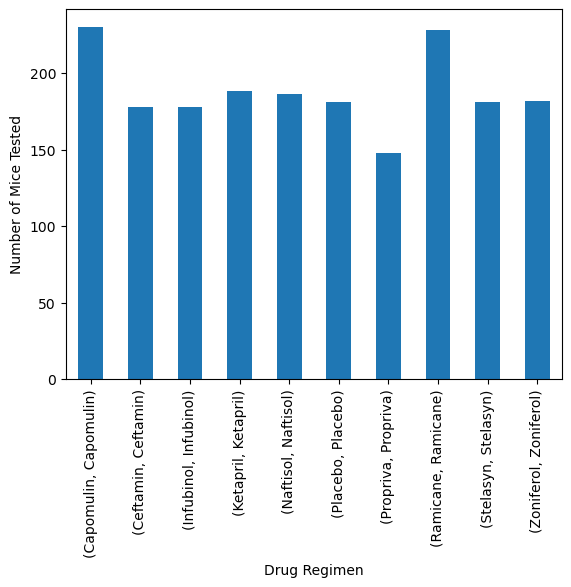

In [447]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.

counts=statistics_table["Drug Regimen"].value_counts()
counts.plot(kind="bar")
plt.xlabel("Drug Regimen")
plt.xticks(rotation=90)
plt.ylabel("Number of Mice Tested")
plt.show

In [159]:
#Grouby gender number
mouse_gender=merge_df.groupby(["Mouse ID", "Sex"])
mouse_gender
#Gender count
mouse_gender_df=pd.DataFrame(mouse_gender.size())
gender_df=pd.DataFrame(mouse_gender_df.groupby(["Sex"]).count())
gender_df.columns = ["Total Count"]
#Percent Female vs Male
gender_df["Percentage of Sex"] = (100*(gender_df["Total Count"] / gender_df["Total Count"].sum()))
gender_df["Percentage of Sex"] = gender_df["Percentage of Sex"]
gender_df

,Total Count,Percentage of Sex
Sex,,
Female,124,49.799197
Male,125,50.200803


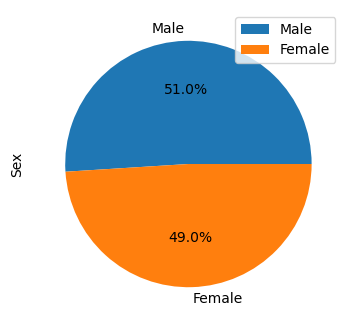

In [445]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
gender_df=pd.DataFrame([51.0,49.0], index=["Male", "Female"], columns=["Sex"])
plot=gender_df.plot (kind="pie", subplots=True, figsize=(4,4), autopct="%1.1f%%")
plt.show()

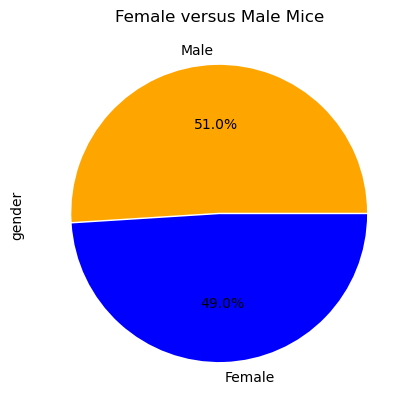

In [446]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
plot=gender_df
gender= ["Male", "Female"]
plots=[51.0, 49.0]
explode=(0.01, 0)
plt.axis = ("equal")
plt.pie (plots, explode=explode, labels=gender, colors=["orange", "blue"], autopct="%1.1f%%")
plt.title("Female versus Male Mice")
plt.ylabel("gender")
plt.savefig("pie_chart")
plt.show()

## Quartiles, Outliers and Boxplots

In [ ]:
# Checking the number of mice in the clean DataFrame.
cleaned_df=cleaned_df["Mouse ID"].value_counts()
cleaned_df

k403    10
o287    10
j984    10
k210    10
k382    10
        ..
h428     1
o848     1
t573     1
d133     1
x226     1
Name: Mouse ID, Length: 248, dtype: int64

In [305]:
capo_df = merge_df.loc[merge_df["Drug Regimen"]== "Capomulin",:]
rami_df = merge_df.loc[merge_df["Drug Regimen"]== "Ramicane",:]
infu_df = merge_df.loc[merge_df["Drug Regimen"]== "Infubinol",:]
ceft_df = merge_df.loc[merge_df["Drug Regimen"]== "Ceftamin",:]
treatments= [capo_df, rami_df, infu_df, ceft_df]
main_drugs=pd.concat(treatments)
last_time=statistics_table["Timepoint"].max() 
merge_treatments=pd.merge(main_drugs, last_time)
#merge_treatments["LastTime"]=merge_treatments["Treatments"] == merge_treatments
tumor_time_df=merge_treatments[["Mouse ID", "Drug Regimen", "Timepoint", "Tumor Volume (mm3)"]]
tumor_time_df

,Mouse ID,Drug Regimen,Timepoint,Tumor Volume (mm3)
0,s185,Capomulin,45,23.343598
1,s185,Capomulin,45,23.343598
2,s185,Capomulin,45,23.343598
3,s185,Capomulin,45,23.343598
4,s185,Capomulin,45,23.343598
...,...,...,...,...
625,y865,Ceftamin,45,64.729837
626,y865,Ceftamin,45,64.729837
627,y865,Ceftamin,45,64.729837
628,y865,Ceftamin,45,64.729837


In [168]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  

capo_df = merge_df.loc[merge_df["Drug Regimen"]== "Capomulin",:]
rami_df = merge_df.loc[merge_df["Drug Regimen"]== "Ramicane",:]
infu_df = merge_df.loc[merge_df["Drug Regimen"]== "Infubinol",:]
ceft_df = merge_df.loc[merge_df["Drug Regimen"]== "Ceftamin",:]

treatments= ["Capomulin", "Ramicane", "Infubinul", "Ceftamin"]
main_drugs=pd.concat(treatments)

# Start by getting the last (greatest) timepoint for each mouse
last_capo = capo_df.groupby("Mouse ID").max()["Timepoint"]
capo_vol = pd.DataFrame(last_capo)
merge_capo=pd.merge(capo_vol, merge_df, on=("Mouse ID", "Timepoint"))
merge_capo.head(5)
# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
group_df=pd.merge(treatments, last_capo, on="Mouse ID")


,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,b128,45,Capomulin,Female,9,22,38.982878,2
1,b742,45,Capomulin,Male,7,21,38.939633,0
2,f966,20,Capomulin,Male,16,17,30.485985,0
3,g288,45,Capomulin,Male,3,19,37.074024,1
4,g316,45,Capomulin,Female,22,22,40.159220,2


In [165]:
last_rami = rami_df.groupby("Mouse ID").max()["Timepoint"]
rami_vol = pd.DataFrame(last_rami)
merge_rami=pd.merge(rami_vol, merge_df, on=("Mouse ID", "Timepoint"))
merge_rami.head(5)

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a411,45,Ramicane,Male,3,22,38.407618,1
1,a444,45,Ramicane,Female,10,25,43.047543,0
2,a520,45,Ramicane,Male,13,21,38.810366,1
3,a644,45,Ramicane,Female,7,17,32.978522,1
4,c458,30,Ramicane,Female,23,20,38.342008,2


In [170]:
last_infu = infu_df.groupby("Mouse ID").max()["Timepoint"]
infu_vol = pd.DataFrame(last_infu)
merge_infu=pd.merge(infu_vol, merge_df, on=("Mouse ID", "Timepoint"))
merge_infu.head(5)

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a203,45,Infubinol,Female,20,23,67.973419,2
1,a251,45,Infubinol,Female,21,25,65.525743,1
2,a577,30,Infubinol,Female,6,25,57.031862,2
3,a685,45,Infubinol,Male,8,30,66.083066,3
4,c139,45,Infubinol,Male,11,28,72.226731,2


In [171]:
last_ceft = ceft_df.groupby("Mouse ID").max()["Timepoint"]
ceft_vol = pd.DataFrame(last_ceft)
merge_ceft=pd.merge(ceft_vol, merge_df, on=("Mouse ID", "Timepoint"))
merge_ceft.head(5)

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a275,45,Ceftamin,Female,20,28,62.999356,3
1,b447,0,Ceftamin,Male,2,30,45.000000,0
2,b487,25,Ceftamin,Female,6,28,56.057749,1
3,b759,30,Ceftamin,Female,12,25,55.742829,1
4,f436,15,Ceftamin,Female,3,25,48.722078,2


In [199]:
tumors=merge_capo["Tumor Volume (mm3)"]

quartiles = tumors.quantile([0.25, 0.5, 0.75])
lowerq=quartiles[0.25]
upperq=quartiles[0.75]
iqr=upperq-lowerq
lower_bound=lowerq - (1.5*iqr)
upper_bound=upperq + (1.5*iqr)

tumors2=merge_rami["Tumor Volume (mm3)"]

quartiles2 = tumors2.quantile([0.25, 0.5, 0.75])
lowerq2=quartiles2[0.25]
upperq2=quartiles2[0.75]
iqr2=upperq2-lowerq2


tumors3=merge_infu["Tumor Volume (mm3)"]

quartiles3 = tumors3.quantile([0.25, 0.5, 0.75])
lowerq3=quartiles3[0.25]
upperq3=quartiles3[0.75]
iqr3=upperq3-lowerq3


tumors4=merge_ceft["Tumor Volume (mm3)"]

quartiles4 = tumors4.quantile([0.25, 0.5, 0.75])
lowerq4=quartiles4[0.25]
upperq4=quartiles4[0.75]
iqr4=upperq4-lowerq4


In [315]:
# Put treatments into a list for for loop (and later for plot labels)
treatments= ["Capomulin", "Ramicane", "Infubinul", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol= []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for drug in treatments:
    vol= tumor_time_df.loc[tumor_time_df["Drug Regimen"]==drug]["Tumor Volume (mm3)"]
    tumor_vol.append(vol)
    #print(tumor_vol)

    # Locate the rows which contain mice on each drug and get the tumor volumes
    quartiles=vol.quantile([0.25,0.5,0.75])
    lowerq=quartiles[0.25]
    upperq=quartiles[0.75]
    iqr=upperq - lowerq
    print(iqr)

    # add subset 
    
    
    # Determine outliers using upper and lower bounds
    lower_bound=lowerq - (1.5*iqr)
    upper_bound=upperq + (1.5*iqr)
    outlier=vol.loc[(vol >upper_bound) | (vol<lower_bound)]
    if len(outlier)>0:
        print(f"The outlier for {drug} are {outlier}.")

7.781863460000004
7.527130082500001
nan
6.093590140000003


In [14]:
# Put treatments into a list for for loop (and later for plot labels)
treatments= ["Capomulin", "Ramicane", "Infubinul", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol= []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for drug in treatments:
    vol= tumor_time_df.loc[tumor_time_df["Drug Regimen"]==drug]["Tumor Volume (mm3)"]
    tumor_vol.append(vol)
    print(tumor_vol)

    # Locate the rows which contain mice on each drug and get the tumor volumes
    quartiles=vol.quantile([0.25,0.5,0.75])
    lowerq=quartiles[0.25]
    upperq=quartiles[0.75]
    iqr=upperq - lowerq
    print(iqr)

    # add subset 
    
    
    # Determine outliers using upper and lower bounds
    lower_bound=lowerq - (1.5*iqr)
    upper_bound=upperq + (1.5*iqr)
    outlier=vol.loc[(vol >upper_bound) | (vol<lower_bound)]
    if len(outlier)>0:
        print(f"The outlier for {drug} are {outlier}.")


    

Capomulin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol's potential outliers: 31    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


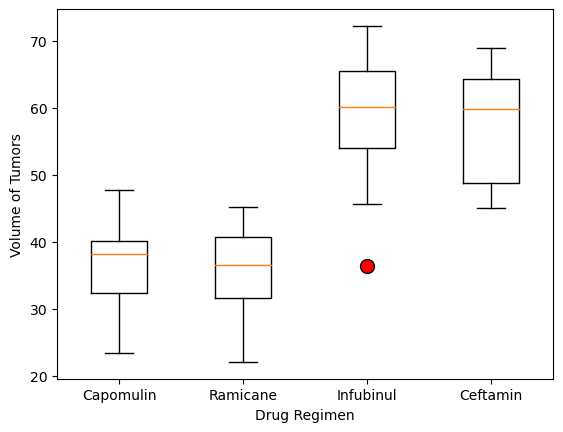

In [442]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.

data_plot = [tumors, tumors2, tumors3, tumors4]
colors=dict(markerfacecolor="red", markersize=10)
plt.boxplot(data_plot, labels=treatments, flierprops=colors)
plt.xlabel("Drug Regimen")
plt.ylabel("Volume of Tumors")
plt.savefig("box_plot")
plt.show()

## Line and Scatter Plots

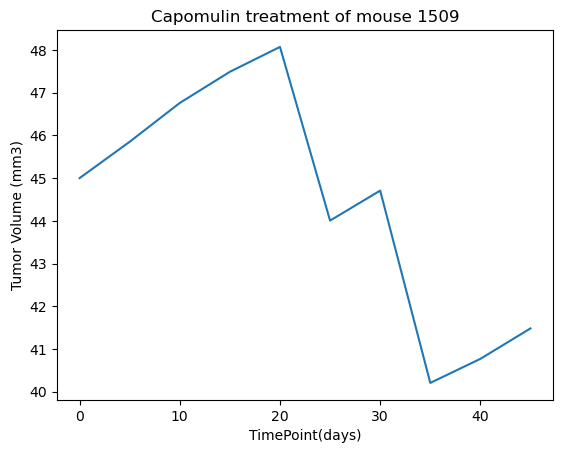

In [438]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
one_mouse=capo_df.loc[capo_df["Mouse ID"]=="l509"]

plt.plot(one_mouse["Timepoint"], one_mouse["Tumor Volume (mm3)"])
plt.title("Capomulin treatment of mouse 1509")
plt.xlabel("TimePoint(days)")
plt.ylabel("Tumor Volume (mm3)")
plt.show()

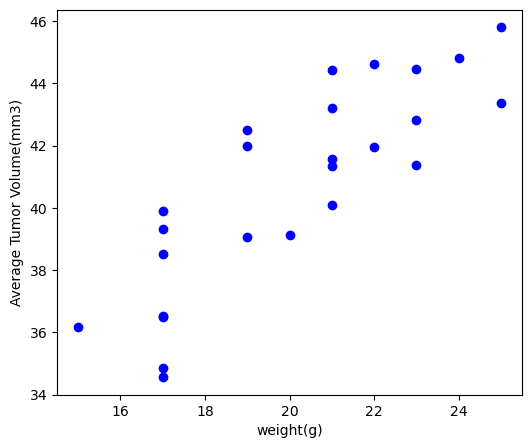

In [444]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen

plt.subplots(figsize=(6,5))
capo_avg=capo_df.groupby(["Mouse ID"]).mean()

plt.scatter(capo_avg["Weight (g)"],capo_avg["Tumor Volume (mm3)"], color="blue")
plt.xlabel("weight(g)",fontsize=10)
plt.ylabel("Average Tumor Volume(mm3)", fontsize=10)
plt.savefig("scatter_plot")
plt.show()

## Correlation and Regression

The correlation coefficient between mouse weight and average tumor volume is 0.84
The r-squared is: 0.7088568047708723


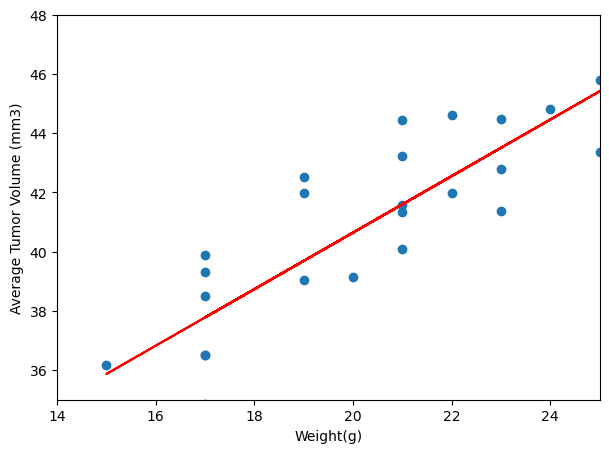

In [434]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
corre= round(st.pearsonr(capo_avg["Weight (g)"],capo_avg["Tumor Volume (mm3)"])[0],2)
print(f"The correlation coefficient between mouse weight and average tumor volume is {corre}")
x_value=capo_avg["Weight (g)"]
y_value=capo_avg["Tumor Volume (mm3)"]
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_value, y_value)
regress = x_value * slope + intercept
plt.figure(figsize=(7,5)) 
plt.scatter(x_value,y_value)
#plt.scatter(capo_avg["Weight (g)"],capo_avg["Tumor Volume (mm3)"], color="blue")
plt.xlabel("Weight(g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.plot(x_value, regress, "r-")
plt.xlim(14,25)
plt.ylim(35,48)
print(f"The r-squared is: {rvalue**2}")
plt.savefig("lined_scatter_plot")
plt.show()
